

```
# This is formatted as code
```

**Expectation:** find solution to MSE regression using GD, Line search, GD with Momentum and 2nd Order Method, and gradient free methods.


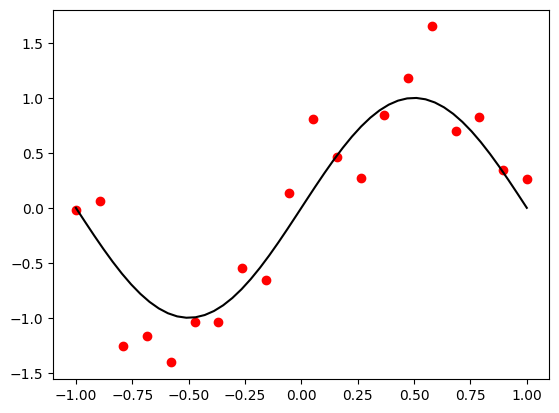

In [50]:
#Linear Regression for general functions
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
pi=math.pi

data_set_size = 20
noise_level = 0.3

# generate 20 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,data_set_size)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+noise_level*np.random.randn(x.size)

# plot the training data points
plt.plot(x, y, 'ro')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')

In [51]:
N = x.shape[0]
M = 10
d = M+1 # dimensionality
X = []
for i in range(M+1):
  X.append(x**i)

X = np.array(X).T

print('x',X.shape)
print('y',y.shape)


x (20, 11)
y (20,)


In previous class we found w $\mathbf{w}$ using the closed form solution, today we first find $\mathbf{w}$ using Gradient Decent (GD). *Note for this toy example the is no reason to use a iterative optimiser, as the exact method exsist but it makes for a nice test bed.*

The Mean Squared Loss / Mean Squared Error (MSE) can be written as follows:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N(\sum_{i=1}^{d+1} x_{n,i} \cdot w_i - y_n)^2
\end{equation}

Or written with matrices:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N} ||X\mathbf{w} - \mathbf{y}||_2^2 = \frac{1}{N} (X\mathbf{w} - \mathbf{y})^\top(X\mathbf{w} - \mathbf{y})
\end{equation}

**Question 1** Derive the gradient of the MSE. Write you answer here in latex:

\begin{equation}
  \hat{y}_i = X_i w
\end{equation}

\begin{equation}
  \nabla_\mathbf{w} L(\mathbf{w}) = \frac{\partial C}{\partial w} = \frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial w} = \frac{2}{n}{\sum{(X_i w-y_i)X_i}} = \frac{2}{n}{X^T}{(Xw-y)} = \frac{2}{n}{(X^{T}Xw-X^Ty)}
\end{equation}

We then use the following update:

**Question 2** prove that $L$ is convex in $\mathbf{w}$ (*hint think about the Hessian*)

Write you awnser here in latex:

To prove that $L$ is convex in $\mathbf{w}$, show that the Hessian matrix is positive semi-definite. That would be the derivative of the grad of L that we have found above.

$$
   \nabla^2 L(\mathbf{w}) = \nabla (\frac{2}{n}{(X^{T}Xw-X^Ty)}) = \frac{2}{n} \mathbf{X}^\top \mathbf{X} \\
$$

The above (gram matrix) is positive semi-definite. Hence, $L$ is convex in $\mathbf{w}$.

**Gradient Descent**

We will first optimise $L(\mathbf{w})$ using Gradient Descent.

Which uses the following update:


\begin{equation}
  \mathbf{w}_{t+1} = \mathbf{w}_t - \eta_t \nabla_\mathbf{w} L(\mathbf{w})
\end{equation}


**Question 3** complete the functions below to calcuate the loss and gradients for a given $X$, $\mathbf{y}$ & $\mathbf{w}$.

In [52]:
# It useful to first write a function that calculates the loss we will use this to measure our progress

def MSE_loss(X, y, w):
  mean_loss = (1/len(y))*(X@w-y).T@(X@w-y)
  return mean_loss

In [53]:
# a quick sanity check for your loss function, If this cell throws and error your loss function still needs work!
assert MSE_loss(np.array([0]), np.array([0]), np.array([0])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([1])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([0])) == 1
assert MSE_loss(np.array([1]), np.array([0]), np.array([1])) == 1

In [54]:
# It is also useful to have a function that calculate gradient at a given point
def grad(x, y, w):
  print('x shape: ', x.shape)
  print('y shape: ', y.shape)
  print('w shape: ', w.shape)

  n = x.shape[0]
  gradient = (2/len(y))*x.T@(x@w-y)
  return gradient

In [55]:
# a quick sanity check for your gradient function, If this cell throws and error your gradient fucntion still needs work!
assert la.norm(grad(np.array([[0,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 0
assert la.norm(grad(np.array([[1,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 1
assert la.norm(grad(np.array([[4,3],[4,3]]), np.zeros((2,1)), np.ones((2,1)))) == 70

x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)
x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)
x shape:  (2, 2)
y shape:  (2, 1)
w shape:  (2, 1)


**Question 4** Implement GD and run for 1000 steps. Save the loss value after each step in the list 'gd_losses'.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

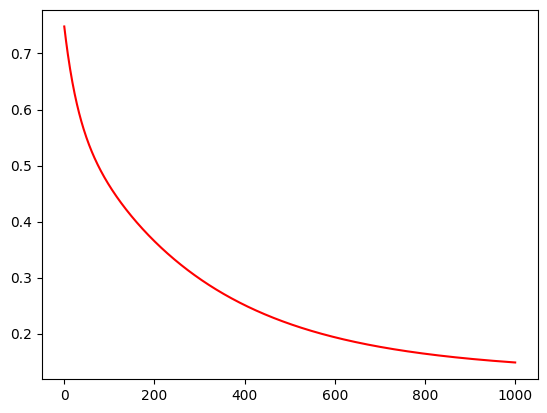

In [56]:
# In order to use an iterative optimisation method we need an initial guess:

w = np.zeros(M+1)

gd_losses = []
gd_losses.append(MSE_loss(X, y, w))

# ... and a step size
eta = 1e-2

number_of_iterations = 1000

for iter in range(number_of_iterations):
  # ----------------------------
  # Your code here
  gradient = grad(X,y,w)
  w -= eta*gradient

  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_losses.append(loss)

  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red')

**Question 5 (Optional)** Experiment different powers of ten for the step sizes $\eta$, empirically what value is the largest for which you get good performance? What does this suggest about the smoothness of $L(\mathbf{w})$?

In [57]:
# In order to use an iterative optimisation method we need an initial guess:

# w = np.zeros(M+1)

# gd_losses = []
# gd_losses.append(MSE_loss(X, y, w))

# number_of_iterations = 1000
# learning_rates = [0.0001, 0.001, 0.01, 0.1]

# for eta in learning_rates:
#     # Initialize weights for each learning rate
#     w = np.zeros(X.shape[1])
    
#     gd_losses = []
#     gd_losses.append(MSE_loss(X, y, w))
    
#     for iter in range(number_of_iterations):
#         # Compute gradient
#         gradient = grad(X, y, w)
        
#         # Update weights
#         w -= eta * gradient
        
#         # Compute and record loss
#         loss = MSE_loss(X, y, w)
#         gd_losses.append(loss)
        
#         if iter % 100 == 99:
#             print(f'Learning Rate: {eta}, Iteration: {iter+1}, Loss: {loss}')
    
#     # Plot losses for the current learning rate
#     plt.figure()  # Create a new figure for each learning rate
#     plt.plot(np.arange(len(gd_losses)), gd_losses, label=f'eta={eta}', color='red')
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE Loss')
#     plt.title(f'Gradient Desce  nt MSE Loss (eta={eta})')
#     plt.legend()
#     plt.show()

**Gradient Descent with Backtracing Line Search**

We will now optimise L using GD however we will use a line search method to select $\eta$ at each update according to the Armijo-Goldstein Condition with hyperparameter c.

\begin{align*}
f(\mathbf{w} - \eta_{t,k}\nabla f(\mathbf{w})) \leq f(\mathbf{w}) - c \eta_{t,k} \| \nabla f(\mathbf{w})\|^2,
\end{align*}

In [58]:
def check_armijo_goldstein_conditions(grad, loss, trail_point_loss, eta, c):
  grad_norm = np.linalg.norm(grad)
  if trail_point_loss <= loss - c * eta * grad_norm:
    return True
  else:
    return False

To run the backtracking line search we first select a trial point $\mathbf{w}'$,  according to $\mathbf{w}_0' = \mathbf{w}_t - \eta_{t,0} \nabla f$ where $\eta_0 = \gamma$. If a trial point satisfies the acceptance condition, we set $\mathbf{w}_t = \mathbf{w}_t'$, otherwise  $\eta_{t,k+1} = \alpha \eta_{t,k}$. And select the next trail point according to $\mathbf{w}_t' = \mathbf{w}_t - \eta_{t,k} \nabla f$.

**Question 6** Implement GD with backtracking line search and run it for 1000 steps, save the loss value after each step in the list 'line_search_losses'.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

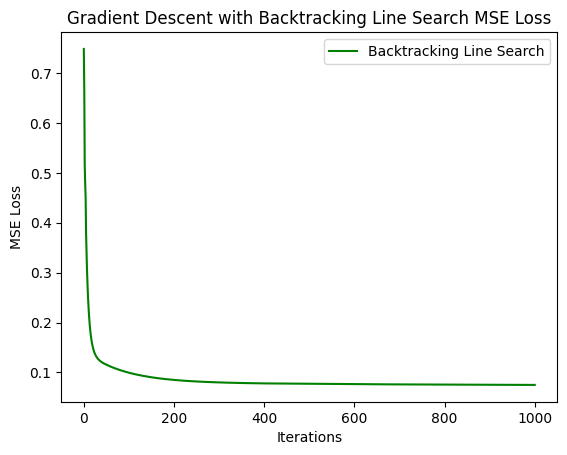

In [59]:
w = np.zeros(M+1)

line_search_losses = []
line_search_losses.append(MSE_loss(X, y, w))

c = 0.001 # acceptance condition of the backtracking line search
gamma = 10 # learning rate. start with a large value and test conditions. if it is false, shrink it.
alpha = 0.8 # to multiply with learning rate
max_k = 50 # make number of line search steps

number_of_iteratons = 1000
loss = MSE_loss(X, y, w)

for iter in range(number_of_iterations):
    gradient = grad(X, y, w)
    eta = gamma
    loss_current = MSE_loss(X, y, w)
    
    for k in range(max_k):
        w_trial = w - eta * gradient
        loss_trial = MSE_loss(X, y, w_trial)
        
        if check_armijo_goldstein_conditions(gradient, loss_current, loss_trial, eta, c):
            w = w_trial
            break
        else:
            eta *= alpha
    
    loss = MSE_loss(X, y, w)
    line_search_losses.append(loss)
    
    if iter % 100 == 99:
        print(f"Iteration {iter + 1}, Loss: {loss}")

# Plotting the results
plt.plot(np.arange(len(line_search_losses)), line_search_losses, 'green', label='Backtracking Line Search')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent with Backtracking Line Search MSE Loss')
plt.legend()
plt.show()

**Gradient Descent with Momentum**

\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta_t \nabla f(\mathbf{w}_t),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**Question 7** Implement GD with momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momentum_losses'. What do you notice when comparing against GD without Momentum?

* A: The descent of gradient descent with momentum is much steeper/faster than gradient descent without momentum. This is as expected as gradient descent with momentum takes large steps along the direction where the past gradients have the same direction.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

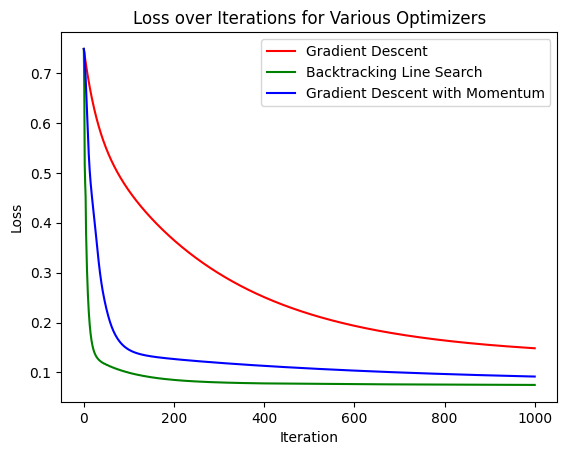

In [60]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_momentum_losses = []
gd_with_momentum_losses.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2  # learning rate
mu = 0.9    # momentum coefficient

number_of_iterations = 1000

m = 0 # initialise momentum velocity

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here
  gradient = grad(X, y, w)
  m = mu*m - eta*gradient
  w += m
  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_momentum_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='Gradient Descent')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green', label='Backtracking Line Search')
plt.plot(np.arange(len(gd_with_momentum_losses)),gd_with_momentum_losses, 'blue', label='Gradient Descent with Momentum')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Various Optimizers')
plt.show()

**Gradient Descent with Nesterov Momentum**


\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta \nabla f(\mathbf{w}_t + \mu \mathbf{m}_{t}),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**###Optional### Question 8** Implement GD with nesterov momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momentum_losses'.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

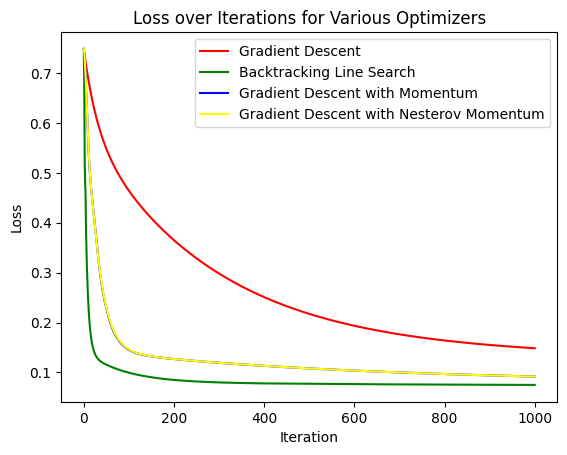

In [61]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_nesterov_momentum = []
gd_with_nesterov_momentum.append(MSE_loss(X, y, w))

# ... and a step size
eta = 1e-2
mu = 0.9

number_of_iterations = 1000

m = 0   # initialise momentum velocity

for iter in range(number_of_iterations):
  # ----------------------------
  # Your code here
  gradient = grad(X, y, w+mu*m)
  m = mu*m - eta*gradient
  w += m
  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_nesterov_momentum.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='Gradient Descent')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green', label='Backtracking Line Search')
plt.plot(np.arange(len(gd_with_momentum_losses)),gd_with_momentum_losses, 'blue', label='Gradient Descent with Momentum')
plt.plot(np.arange(len(gd_with_nesterov_momentum)),gd_with_nesterov_momentum, 'yellow', label='Gradient Descent with Nesterov Momentum')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Various Optimizers')
plt.show()

**Exact Second Order**

\begin{align*}
\mathbf{w}_{t+1} = \mathbf{w}_{t} -{H}_f^{-1}\nabla f(\mathbf{w}_t).
\end{align*}

Where ${H}_f$ is the hessain.

**Question 9** Implement the exact second order optimiser 1000 steps, save the loss value after each step in the list 'second_order_losses'.

x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (20,)
w shape:  (11,)
x shape:  (20, 11)
y shape:  (2

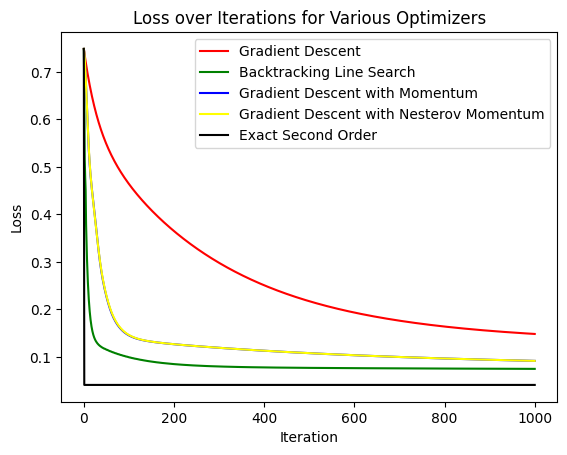

In [62]:
w = np.zeros(M+1)

second_order_losses = []
second_order_losses.append(MSE_loss(X, y, w))

# ... note here we don't need learning rate

number_of_iteratons = 1000

# Define the Hessian
h = (2/len(y))*X.T@X
h_inv = np.linalg.inv(h)

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here
  gradient = grad(X, y, w+mu*m)
  w -= h_inv@gradient
  # ----------------------------
  loss = MSE_loss(X, y, w)
  second_order_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='Gradient Descent')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green', label='Backtracking Line Search')
plt.plot(np.arange(len(gd_with_momentum_losses)),gd_with_momentum_losses, 'blue', label='Gradient Descent with Momentum')
plt.plot(np.arange(len(gd_with_nesterov_momentum)),gd_with_nesterov_momentum, 'yellow', label='Gradient Descent with Nesterov Momentum')
plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black', label='Exact Second Order')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Various Optimizers')
plt.show()


**Question 10** Try adjusting the learning rates, which optimiser is quickest? How many steps does it take to converge? Why is this? Which is the second quickest?

* A: The exact second order is the quickest as it is the exact solution. It takes one step to converge. As the learning rate, $\eta$, is varied, it is observed that the backtracking line search optimiser is the second quickest. This could be due to its adaptive step size that allows the algorithm to dynamically adjust to the local curvature of the loss function.

**Reading** - Gradient Free Optimiation



Gradient Free Coodinate Descent

Gradient free optimisers are useful when the gradient can't easily be calculated. Instead of using the gradient they only use loss values. They start by picking a candidate direction $\mathbf{p}_t$ and then evalulating the loss in the direction of $\mathbf{p}_t$.


In this assignment you will code up the three point algorithm that selects the next point according to:

\begin{equation}
\mathbf{w}_{t+1} = \text{argmin}\{ f(\mathbf{w}_t - \eta \mathbf{p}_t), f(\mathbf{w}_t), f(\mathbf{w}_t + \eta \mathbf{p}_t )\}
\end{equation}

In words we pick the next iterate to be the point with lowest loss out of the three trail points.

In the coodinate descent optimiser $\mathbf{p}_t$ is sampled from $\{\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_d\}$ with equal probability where $\mathbf{e}_i$ is the $i^{th}$ unit vertor.




**Question 11** Implement the a gradient free coodinate descent optimiser and run for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

0.19225397626129084
0.1313621068600795
0.11375899182733137
0.10521698809556057
0.10183321855436864
0.09471536146532028
0.08922176606798933
0.08674712771274544
0.08674712771274544
0.08409558862007813


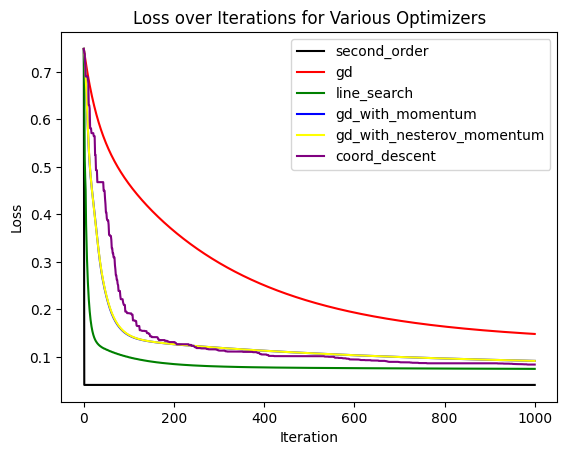

In [63]:
w = np.zeros(M+1)

coord_dec_losses = []
coord_dec_losses.append(MSE_loss(X, y, w))

number_of_iterations = 1000
eta = 0.1

for iter in range(number_of_iterations):
    # Select a random coordinate direction
    d = M + 1
    i = np.random.randint(d)
    e_i = np.zeros(d)
    e_i[i] = 1

    # Evaluate the loss at three points
    w_minus = w - eta * e_i
    w_plus = w + eta * e_i

    loss_minus = MSE_loss(X, y, w_minus)
    loss_current = MSE_loss(X, y, w)
    loss_plus = MSE_loss(X, y, w_plus)

    # Update w to the point with the lowest loss
    if loss_minus < loss_current and loss_minus < loss_plus:
        w = w_minus
    elif loss_plus < loss_current:
        w = w_plus
    # Else, w remains unchanged

    # Append the current loss to the list
    coord_dec_losses.append(MSE_loss(X, y, w))

    # Decrease the learning rate slightly
    eta *= 0.999

    # Print the loss every 100 iterations
    if iter % 100 == 99:
        print(coord_dec_losses[-1])

# Plotting the loss over iterations
plt.plot(np.arange(len(second_order_losses)), second_order_losses, 'black', label='second_order')
plt.plot(np.arange(len(gd_losses)), gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)), line_search_losses, 'green', label='line_search')
plt.plot(np.arange(len(gd_with_momentum_losses)), gd_with_momentum_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momentum)), gd_with_nesterov_momentum, 'yellow', label='gd_with_nesterov_momentum')
plt.plot(np.arange(len(coord_dec_losses)), coord_dec_losses, 'purple', label='coord_descent')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Various Optimizers')
plt.show()

**Optional - Question 12** Implement a gradient free optimiser that instead selects $\mathbf{p}$ uniformly from the unit hyper-sphere of dimention $d=$ (M+1) and run it for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605
0.7482049774620605


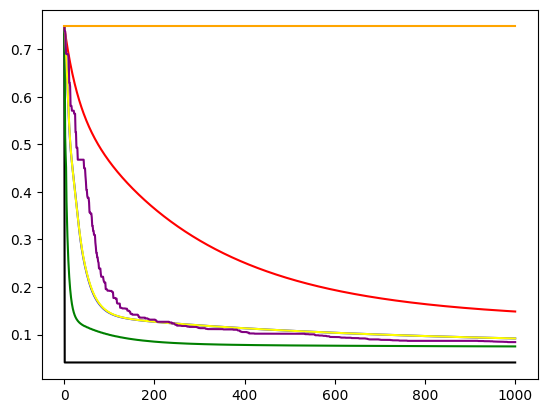

In [64]:
w = np.zeros(M+1)

grad_free_losses = []
grad_free_losses.append(MSE_loss(X, y, w))

number_of_iterations = 1000
eta = 0.1

for iter in range(number_of_iterations):
  # ----------------------------
  # Your code here

  # --------------------------
  loss = MSE_loss(X, y, w)
  grad_free_losses.append(loss)
  eta *= 0.999
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momentum_losses)),gd_with_momentum_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momentum)),gd_with_nesterov_momentum, 'yellow', label='gd_with_momentum')
plt.plot(np.arange(len(coord_dec_losses)),coord_dec_losses, 'purple')
plt.plot(np.arange(len(grad_free_losses)),grad_free_losses, 'orange')

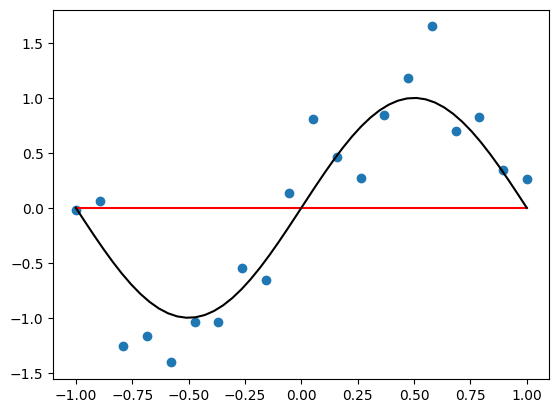

In [65]:
# Run this cell if you want to visualise a final model
yhat = X@w
plt.plot(x,y,'o', x, yhat, 'red')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')